#💡 Sobre o Desafío 💡

Telecom X - Análise de Evasão de Clientes
Você foi contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da sua análise, os demais colegas da  equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

O que você vai praticar:
✅ Importar e manipular dados de uma API de forma eficiente.
✅ Aplicar os conceitos de ETL (Extração, Transformação e Carga) na preparação dos dados.
✅ Criar visualizações de dados estratégicas para identificar padrões e tendências.
✅ Realizar uma Análise Exploratória de Dados (EDA) e gerar um relatório com insights relevantes.

Agora é sua vez! 🚀 Use seus conhecimentos para transformar dados brutos em informações estratégicas e ajudar a Telecom X a reter mais clientes.




Dicionário de dados
customerID: número de identificação único de cada cliente
Churn: se o cliente deixou ou não a empresa
gender: gênero (masculino e feminino)
SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
Partner: se o cliente possui ou não um parceiro ou parceira
Dependents: se o cliente possui ou não dependentes
tenure: meses de contrato do cliente
PhoneService: assinatura de serviço telefônico
MultipleLines: assisnatura de mais de uma linha de telefone
InternetService: assinatura de um provedor internet
OnlineSecurity: assinatura adicional de segurança online
OnlineBackup: assinatura adicional de backup online
DeviceProtection: assinatura adicional de proteção no dispositivo
TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
StreamingTV: assinatura de TV a cabo
StreamingMovies: assinatura de streaming de filmes
Contract: tipo de contrato
PaperlessBilling: se o cliente prefere receber online a fatura
PaymentMethod: forma de pagamento
Charges.Monthly: total de todos os serviços do cliente por mês
Charges.Total: total gasto pelo cliente

# Extração

In [ ]:
# --- ETAPA DE EXTRAÇÃO ---

# 1. Importar as bibliotecas necessárias
import pandas as pd
import requests

# 2. Definir a URL da API que contém os dados
# Este é o link "raw" que aponta diretamente para o arquivo JSON.
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

print("Iniciando a extração de dados da API...")

# 3. Carregar os dados da API
try:
    # Usar 'requests' é uma boa prática para buscar dados de uma URL.
    # Ele nos permite verificar o status da requisição antes de continuar.
    response = requests.get(url)

    # Verifica se a requisição foi bem-sucedida (código de status 200)
    response.raise_for_status()

    # Converte o conteúdo da resposta (que está em formato JSON) para um objeto Python
    data = response.json()

    print("Dados extraídos com sucesso!")

except requests.exceptions.RequestException as e:
    print(f"Erro ao acessar a API: {e}")
    data = None

# 4. Converter os dados extraídos para um DataFrame do Pandas
if data:
    # Criamos o DataFrame inicial. Note que ele ainda terá colunas aninhadas.
    df_bruto = pd.DataFrame(data)

    # 5. Inspecionar os dados brutos para entender a estrutura inicial
    # Esta é a conclusão da etapa de Extração: ter os dados brutos prontos para a Transformação.
    print("\n--- INSPECIONANDO OS DADOS BRUTOS CARREGADOS ---")

    print("\nDimensões do DataFrame (linhas, colunas):", df_bruto.shape)

    print("\nTipos de dados iniciais:")
    df_bruto.info()

    print("\nVisualização das 5 primeiras linhas do DataFrame bruto:")
    # Usar display() em vez de print() para um formato de tabela mais legível no notebook
    display(df_bruto.head())
else:
    print("A extração falhou. Não foi possível criar o DataFrame.")

Iniciando a extração de dados da API...
Dados extraídos com sucesso!

--- INSPECIONANDO OS DADOS BRUTOS CARREGADOS ---

Dimensões do DataFrame (linhas, colunas): (7267, 6)

Tipos de dados iniciais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Visualização das 5 primeiras linhas do DataFrame bruto:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#2. transformação

In [ ]:
# --- CONHECENDO O DATASET (VERSÃO APRIMORADA) ---

# Vamos usar o DataFrame 'df_bruto', que é o resultado da extração inicial.
print("--- Iniciando a exploração inicial do Dataset ---")

# =================================================================================
# ✅ PASSO 1: Explorar as colunas do dataset e verificar seus tipos de dados.
# =================================================================================

print("\n--- 1.1) Análise Completa com .info() ---")
# Usando os parâmetros recomendados pela documentação para uma análise mais profunda:
# verbose=True: Garante que todas as colunas sejam exibidas, mesmo que o DataFrame seja muito largo.
# memory_usage='deep': Faz uma introspecção mais profunda para calcular o uso real de memória,
#                      especialmente útil para colunas de texto (object).
print("Usando df.info() para uma visão geral completa (nomes, contagem de nulos, tipo e memória):")
df_bruto.info(verbose=True, memory_usage='deep')
print("\n* Insight do .info():")
print("   - Vemos que não há valores nulos na camada principal do JSON (7267 non-null).")
print("   - Identificamos colunas 'object' (como 'customer', 'phone', etc.) que na verdade são dicionários e precisarão de tratamento.")
print("   - A coluna 'Churn' também é um 'object' (texto) e precisará ser analisada.")
print("   - O uso de memória ('memory usage') nos dá uma ideia do tamanho do dataset na memória RAM.")


print("\n\n--- 1.2) Foco nos Tipos de Dados com .dtypes ---")
# O .dtypes é uma forma mais rápida e limpa de focar apenas nos tipos de dados.
# É útil para obter uma lista rápida que pode ser usada em lógicas de programação.
print("Usando df.dtypes para uma lista rápida e direta dos tipos de cada coluna:")
display(df_bruto.dtypes)


print("\n\n--- 1.3) Dimensões do Dataset com .shape ---")
# Mostra uma tupla com (número_de_linhas, número_de_colunas)
print(f"O dataset possui {df_bruto.shape[0]} linhas (clientes) e {df_bruto.shape[1]} colunas (atributos iniciais).")


print("\n\n--- 1.4) Amostra Visual dos Dados com .head() ---")
print("Visualizando as 5 primeiras linhas para entender a estrutura aninhada dos dados:")
display(df_bruto.head())


# =================================================================================
# ✅ PASSO 2: Consultar o dicionário para entender o significado das variáveis.
# =================================================================================
print("\n--- 2) Análise do Dicionário de Dados (Etapa Conceitual) ---")
print("A consulta ao dicionário de dados fornecido foi realizada.")
print("Conclusão: Cada coluna foi compreendida em seu contexto de negócio. Por exemplo, 'tenure' representa a fidelidade do cliente em meses, enquanto 'SeniorCitizen' é uma flag binária (0 ou 1) para clientes com 65 anos ou mais.")


# =================================================================================
# ✅ PASSO 3: Identificar as colunas mais relevantes para a análise de evasão.
# =================================================================================
print("\n--- 3) Identificação das Variáveis-Chave para a Análise de Churn ---")
print("Com base no objetivo de negócio (entender a evasão), as seguintes colunas são identificadas como as mais relevantes para uma análise aprofundada:")
print("\nVariáveis de Comportamento e Contrato:")
print("  - Churn: A nossa variável-alvo, o que queremos prever ou entender.")
print("  - Contract (Tipo_de_Contrato): Contratos mais curtos tendem a ter maior evasão.")
print("  - tenure (Tempo_de_Contrato_Meses): A fidelidade do cliente é um forte indicador de churn.")
print("\nVariáveis Financeiras:")
print("  - Charges.Monthly (Gasto_Mensal): Valores altos podem ser um motivo de cancelamento.")
print("  - PaymentMethod (Metodo_de_Pagamento): Métodos que exigem ação manual podem ter maior churn.")
print("\nVariáveis de Perfil e Engajamento:")
print("  - TechSupport (Suporte_Tecnico): A falta de suporte técnico pode gerar insatisfação.")
print("  - InternetService (Servico_de_Internet): O tipo de serviço (Fibra ou DSL) pode influenciar na satisfação e, consequentemente, no churn.")

--- Iniciando a exploração inicial do Dataset ---

--- 1.1) Análise Completa com .info() ---
Usando df.info() para uma visão geral completa (nomes, contagem de nulos, tipo e memória):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 6.8 MB

* Insight do .info():
   - Vemos que não há valores nulos na camada principal do JSON (7267 non-null).
   - Identificamos colunas 'object' (como 'customer', 'phone', etc.) que na verdade são dicionários e precisarão de tratamento.
   - A coluna 'Churn' também é um 'object' (texto) e precisará ser analisada.
   - O uso de memória ('memory usage') no

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object




--- 1.3) Dimensões do Dataset com .shape ---
O dataset possui 7267 linhas (clientes) e 6 colunas (atributos iniciais).


--- 1.4) Amostra Visual dos Dados com .head() ---
Visualizando as 5 primeiras linhas para entender a estrutura aninhada dos dados:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."



--- 2) Análise do Dicionário de Dados (Etapa Conceitual) ---
A consulta ao dicionário de dados fornecido foi realizada.
Conclusão: Cada coluna foi compreendida em seu contexto de negócio. Por exemplo, 'tenure' representa a fidelidade do cliente em meses, enquanto 'SeniorCitizen' é uma flag binária (0 ou 1) para clientes com 65 anos ou mais.

--- 3) Identificação das Variáveis-Chave para a Análise de Churn ---
Com base no objetivo de negócio (entender a evasão), as seguintes colunas são identificadas como as mais relevantes para uma análise aprofundada:

Variáveis de Comportamento e Contrato:
  - Churn: A nossa variável-alvo, o que queremos prever ou entender.
  - Contract (Tipo_de_Contrato): Contratos mais curtos tendem a ter maior evasão.
  - tenure (Tempo_de_Contrato_Meses): A fidelidade do cliente é um forte indicador de churn.

Variáveis Financeiras:
  - Charges.Monthly (Gasto_Mensal): Valores altos podem ser um motivo de cancelamento.
  - PaymentMethod (Metodo_de_Pagamento): Méto

1. verificando inconsistências dos dados

In [ ]:
# --- ETAPA DE TRANSFORMAÇÃO (PARTE 1: NORMALIZAÇÃO) ---

# 1. Verificar se a variável 'data' da etapa de extração existe
if 'data' in locals():
    print("Iniciando a normalização do DataFrame...")

    # 2. Usar json_normalize para achatar a estrutura aninhada
    # O separador '_' criará nomes de coluna como 'customer_gender', 'account_Charges_Monthly', etc.
    df_normalizado = pd.json_normalize(data, sep='_')

    print("DataFrame normalizado com sucesso!")

    # 3. Inspecionar o novo DataFrame transformado
    print("\n--- INSPECIONANDO O DATAFRAME NORMALIZADO ---")

    print("\nDimensões do DataFrame (linhas, colunas):", df_normalizado.shape)

    print("\nTipos de dados após a normalização:")
    df_normalizado.info()

    print("\nVisualização das 5 primeiras linhas do DataFrame normalizado:")
    display(df_normalizado.head())

else:
    print("ERRO: A variável 'data' não foi encontrada. Execute a célula de Extração primeiro.")

Iniciando a normalização do DataFrame...
DataFrame normalizado com sucesso!

--- INSPECIONANDO O DATAFRAME NORMALIZADO ---

Dimensões do DataFrame (linhas, colunas): (7267, 21)

Tipos de dados após a normalização:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  in

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


2. Verificando inconsistências dos dados

In [ ]:
# --- ETAPA DE TRANSFORMAÇÃO (PARTE 2: TRATAMENTO DE DADOS) ---

# Criar uma cópia do DataFrame normalizado para mantermos o original intacto
df_tratado = df_normalizado.copy()
print("Iniciando o tratamento de inconsistências...")

# 1. Tratar a coluna 'account_Charges_Total' (a correção mais importante)
# A coluna contém espaços (' ') que impedem a conversão para número.
# Usamos pd.to_numeric com errors='coerce' para transformar esses espaços em valores Nulos (NaN).
df_tratado['account_Charges_Total'] = pd.to_numeric(df_tratado['account_Charges_Total'], errors='coerce')

# [CÓDIGO ATUALIZADO] Agora, tratamos os valores nulos que foram criados.
# Esta é a forma recomendada que evita o 'FutureWarning'.
df_tratado['account_Charges_Total'] = df_tratado['account_Charges_Total'].fillna(0)
print("Coluna 'account_Charges_Total' corrigida e convertida para numérica.")

# 2. Remover registros onde a coluna 'Churn' está vazia
# Contamos quantos são antes de remover para ter um registro da limpeza
churn_vazios_antes = (df_tratado['Churn'] == '').sum()
if churn_vazios_antes > 0:
    # Usamos .copy() ao final para garantir que não estamos trabalhando em uma "fatia" do DataFrame
    df_tratado = df_tratado[df_tratado['Churn'] != ''].copy()
    print(f"{churn_vazios_antes} registros com 'Churn' vazio foram removidos.")

# 3. Padronizar os valores 'No phone/internet service' para 'No'
# Isso torna as colunas de serviços consistentes (apenas 'Yes' e 'No')
cols_servicos = [
    'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies'
]
for col in cols_servicos:
    # O método .replace() é seguro e eficiente para esta tarefa
    df_tratado[col] = df_tratado[col].replace({'No phone service': 'No', 'No internet service': 'No'})
print("Valores de serviços padronizados para 'No'.")

# 4. Otimizar os tipos de dados (passo final da limpeza)
# Converter colunas de texto para o tipo 'category' economiza memória e acelera análises.
colunas_categoricas = [
    'Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService',
    'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod'
]
for col in colunas_categoricas:
    df_tratado[col] = df_tratado[col].astype('category')
print("Tipos de dados das colunas categóricas otimizados.")


# --- Verificação Final ---
print("\n--- VERIFICAÇÃO APÓS O TRATAMENTO ---")
print("\nTipos de dados finais:")
df_tratado.info()

print("\nVerificando se ainda existem valores nulos (0 esperado):")
# .sum().sum() soma todos os nulos de todas as colunas, resultando em um único número
print(f"Total de valores nulos no DataFrame: {df_tratado.isnull().sum().sum()}")

print("\nValores únicos na coluna 'Churn' após limpeza:")
print(df_tratado['Churn'].unique())

print("\nValores únicos em 'phone_MultipleLines' após limpeza:")
print(df_tratado['phone_MultipleLines'].unique())

Iniciando o tratamento de inconsistências...
Coluna 'account_Charges_Total' corrigida e convertida para numérica.
224 registros com 'Churn' vazio foram removidos.
Valores de serviços padronizados para 'No'.
Tipos de dados das colunas categóricas otimizados.

--- VERIFICAÇÃO APÓS O TRATAMENTO ---

Tipos de dados finais:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7043 non-null   object  
 1   Churn                      7043 non-null   category
 2   customer_gender            7043 non-null   category
 3   customer_SeniorCitizen     7043 non-null   int64   
 4   customer_Partner           7043 non-null   category
 5   customer_Dependents        7043 non-null   category
 6   customer_tenure            7043 non-null   int64   
 7   phone_PhoneService         7043 non-null   category
 8   ph

3. Coluna de Contas Diárias

In [ ]:
# --- ETAPA DE TRANSFORMAÇÃO (PARTE 3: ENGENHARIA DE ATRIBUTOS) ---

print("Criando a nova coluna 'Contas_Diarias'...")

# 1. Criar a nova coluna dividindo a cobrança mensal por 30
# Usamos o DataFrame 'df_tratado' e a coluna 'account_Charges_Monthly'
df_tratado['Contas_Diarias'] = df_tratado['account_Charges_Monthly'] / 30

print("Coluna 'Contas_Diarias' criada com sucesso.")

# 2. Visualizar a nova coluna ao lado da original para verificar o cálculo
print("\nVisualização das colunas de gastos mensais e diários:")
display(df_tratado[['account_Charges_Monthly', 'Contas_Diarias']].head())

# 3. Verificar o tipo de dado da nova coluna
print("\nInformações do DataFrame após adicionar a nova coluna:")
df_tratado.info()

Criando a nova coluna 'Contas_Diarias'...
Coluna 'Contas_Diarias' criada com sucesso.

Visualização das colunas de gastos mensais e diários:


,account_Charges_Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667



Informações do DataFrame após adicionar a nova coluna:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7043 non-null   object  
 1   Churn                      7043 non-null   category
 2   customer_gender            7043 non-null   category
 3   customer_SeniorCitizen     7043 non-null   int64   
 4   customer_Partner           7043 non-null   category
 5   customer_Dependents        7043 non-null   category
 6   customer_tenure            7043 non-null   int64   
 7   phone_PhoneService         7043 non-null   category
 8   phone_MultipleLines        7043 non-null   category
 9   internet_InternetService   7043 non-null   category
 10  internet_OnlineSecurity    7043 non-null   category
 11  internet_OnlineBackup      7043 non-null   category
 12  internet_DeviceProtection  7043 non-nul

4. Padronização e Transformação de Dados (Opcional)

In [ ]:
# --- ETAPA DE TRANSFORMAÇÃO (PARTE 4: PADRONIZAÇÃO FINAL - VERSÃO ROBUSTA) ---

print("Iniciando a padronização final dos dados...")

# --- 1. Transformar colunas binárias em numéricas (1/0) ---

# Dicionário mapeando os nomes antigos para os novos
colunas_para_processar = {
    'customer_Partner': 'Possui_Parceiro',
    'customer_Dependents': 'Possui_Dependentes',
    'phone_PhoneService': 'Servico_Telefonico',
    'phone_MultipleLines': 'Multiplas_Linhas',
    'internet_OnlineSecurity': 'Seguranca_Online',
    'internet_OnlineBackup': 'Backup_Online',
    'internet_DeviceProtection': 'Protecao_de_Dispositivo',
    'internet_TechSupport': 'Suporte_Tecnico',
    'internet_StreamingTV': 'Streaming_de_TV',
    'internet_StreamingMovies': 'Streaming_de_Filmes',
    'account_PaperlessBilling': 'Fatura_Online',
    'Churn': 'Churn' # Mantém o nome Churn
}

for nome_antigo, nome_novo in colunas_para_processar.items():
    # Verifica se a coluna com o nome antigo AINDA existe no DataFrame
    if nome_antigo in df_tratado.columns:
        # Passo 1: Substituir 'Yes' por 1 e 'No' por 0
        df_tratado[nome_antigo] = df_tratado[nome_antigo].replace({'Yes': 1, 'No': 0})
        # Passo 2: Converter a coluna para o tipo inteiro
        df_tratado[nome_antigo] = df_tratado[nome_antigo].astype(int)

print("Colunas binárias convertidas para o tipo numérico (int).")


# --- 2. Renomear todas as colunas para português ---

# Dicionário de renomeação completo
nomes_finais = {
    'customerID': 'ID_Cliente',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'Idoso',
    'customer_Partner': 'Possui_Parceiro',
    'customer_Dependents': 'Possui_Dependentes',
    'customer_tenure': 'Tempo_de_Contrato_Meses',
    'phone_PhoneService': 'Servico_Telefonico',
    'phone_MultipleLines': 'Multiplas_Linhas',
    'internet_InternetService': 'Servico_de_Internet',
    'internet_OnlineSecurity': 'Seguranca_Online',
    'internet_OnlineBackup': 'Backup_Online',
    'internet_DeviceProtection': 'Protecao_de_Dispositivo',
    'internet_TechSupport': 'Suporte_Tecnico',
    'internet_StreamingTV': 'Streaming_de_TV',
    'internet_StreamingMovies': 'Streaming_de_Filmes',
    'account_Contract': 'Tipo_de_Contrato',
    'account_PaperlessBilling': 'Fatura_Online',
    'account_PaymentMethod': 'Metodo_de_Pagamento',
    'account_Charges_Monthly': 'Gasto_Mensal',
    'account_Charges_Total': 'Gasto_Total'
    # 'Churn' e 'Contas_Diarias' já estão com nomes bons
}

# Renomeia o DataFrame. Se a coluna já foi renomeada, não acontece nada.
df_tratado.rename(columns=nomes_finais, inplace=True)

print("Colunas renomeadas para português.")

# --- Verificação Final ---
print("\n--- VISUALIZAÇÃO DO DATAFRAME FINAL ---")
print("\nTipos de dados após a padronização final:")
df_tratado.info()

print("\nVisualização das 5 primeiras linhas do DataFrame finalizado:")
display(df_tratado.head())

Iniciando a padronização final dos dados...
Colunas binárias convertidas para o tipo numérico (int).
Colunas renomeadas para português.

--- VISUALIZAÇÃO DO DATAFRAME FINAL ---

Tipos de dados após a padronização final:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID_Cliente               7043 non-null   object  
 1   Churn                    7043 non-null   int64   
 2   Genero                   7043 non-null   category
 3   Idoso                    7043 non-null   int64   
 4   Possui_Parceiro          7043 non-null   int64   
 5   Possui_Dependentes       7043 non-null   int64   
 6   Tempo_de_Contrato_Meses  7043 non-null   int64   
 7   Servico_Telefonico       7043 non-null   int64   
 8   Multiplas_Linhas         7043 non-null   int64   
 9   Servico_de_Internet      7043 non-null   category
 10  Seguranca_Onl

/tmp/ipython-input-25-791706844.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_tratado[nome_antigo] = df_tratado[nome_antigo].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-25-791706844.py:27: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_tratado[nome_antigo] = df_tratado[nome_antigo].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-25-791706844.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To

,ID_Cliente,Churn,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Tempo_de_Contrato_Meses,Servico_Telefonico,Multiplas_Linhas,Servico_de_Internet,...,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_de_TV,Streaming_de_Filmes,Tipo_de_Contrato,Fatura_Online,Metodo_de_Pagamento,Gasto_Mensal,Gasto_Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#3. 📊 Carga e Análise (L - Load & Analysis)

1. ANÁLISE DESCRITIVA

In [ ]:
# --- 1. ANÁLISE DESCRITIVA ---

print("--- Análise Descritiva das Colunas NUMÉRICAS ---")
# Usando .round(2) para arredondar os valores para 2 casas decimais, melhorando a leitura
display(df_tratado.describe().round(2))

print("\n\n--- Análise Descritiva das Colunas CATEGÓRICAS ---")
# O parâmetro include=['category'] faz o describe funcionar para colunas categóricas
display(df_tratado.describe(include=['category']))

--- Análise Descritiva das Colunas NUMÉRICAS ---


,Churn,Idoso,Possui_Parceiro,Possui_Dependentes,Tempo_de_Contrato_Meses,Servico_Telefonico,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_de_TV,Streaming_de_Filmes,Fatura_Online,Gasto_Mensal,Gasto_Total,Contas_Diarias
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.0,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.27,0.16,0.48,0.30,32.37,0.9,0.42,0.29,0.34,0.34,0.29,0.38,0.39,0.59,64.76,2279.73,2.16
std,0.44,0.37,0.50,0.46,24.56,0.3,0.49,0.45,0.48,0.48,0.45,0.49,0.49,0.49,30.09,2266.79,1.00
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,0.00,0.61
25%,0.00,0.00,0.00,0.00,9.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35.50,398.55,1.18
50%,0.00,0.00,0.00,0.00,29.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,70.35,1394.55,2.34
75%,1.00,0.00,1.00,1.00,55.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,89.85,3786.60,2.99
max,1.00,1.00,1.00,1.00,72.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,118.75,8684.80,3.96




--- Análise Descritiva das Colunas CATEGÓRICAS ---


,Genero,Servico_de_Internet,Tipo_de_Contrato,Metodo_de_Pagamento
count,7043,7043,7043,7043
unique,2,3,3,4
top,Male,Fiber optic,Month-to-month,Electronic check
freq,3555,3096,3875,2365


2. Distribuição da Evasão

--- Análise da Distribuição do Churn (Contagem e Proporção) ---


/tmp/ipython-input-41-3366513344.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df_tratado, palette=['#5cb85c', '#d9534f'])


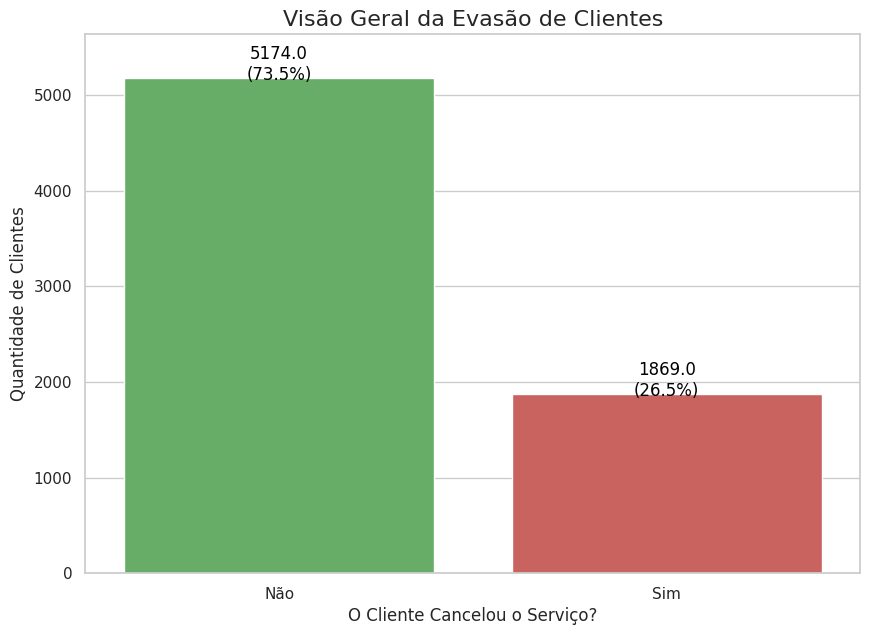

In [ ]:
# --- 2. DISTRIBUIÇÃO DA EVASÃO (VERSÃO MELHORADA) ---
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

print("--- Análise da Distribuição do Churn (Contagem e Proporção) ---")

total_clientes = len(df_tratado) # Calcula o número total de clientes

plt.figure(figsize=(10, 7))
ax = sns.countplot(x='Churn', data=df_tratado, palette=['#5cb85c', '#d9534f'])

# Loop para adicionar os rótulos de contagem e porcentagem
for p in ax.patches:
    contagem = p.get_height()
    porcentagem = f'({100 * contagem / total_clientes:.1f}%)' # Calcula e formata a porcentagem
    texto_completo = f'{contagem}\n{porcentagem}' # Junta contagem e porcentagem

    ax.annotate(texto_completo,
                (p.get_x() + p.get_width() / 2., contagem),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.title('Visão Geral da Evasão de Clientes', fontsize=16)
plt.xlabel('O Cliente Cancelou o Serviço?', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.ylim(0, total_clientes * 0.8) # Ajusta o eixo Y para dar espaço aos rótulos
plt.show()

3. Contagem de Evasão por Variáveis Categóricas

--- Análise Proporcional de Churn por Categoria (com Contagem Absoluta) ---


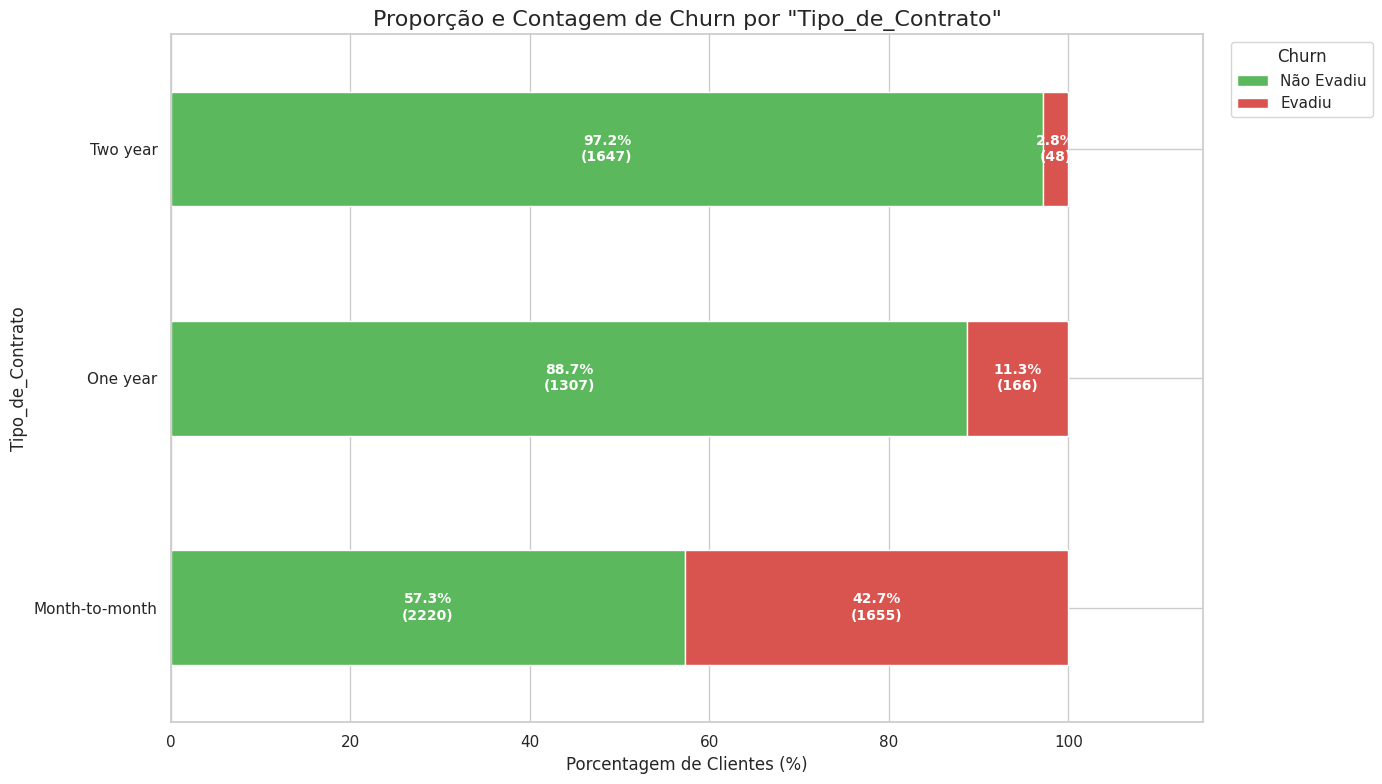

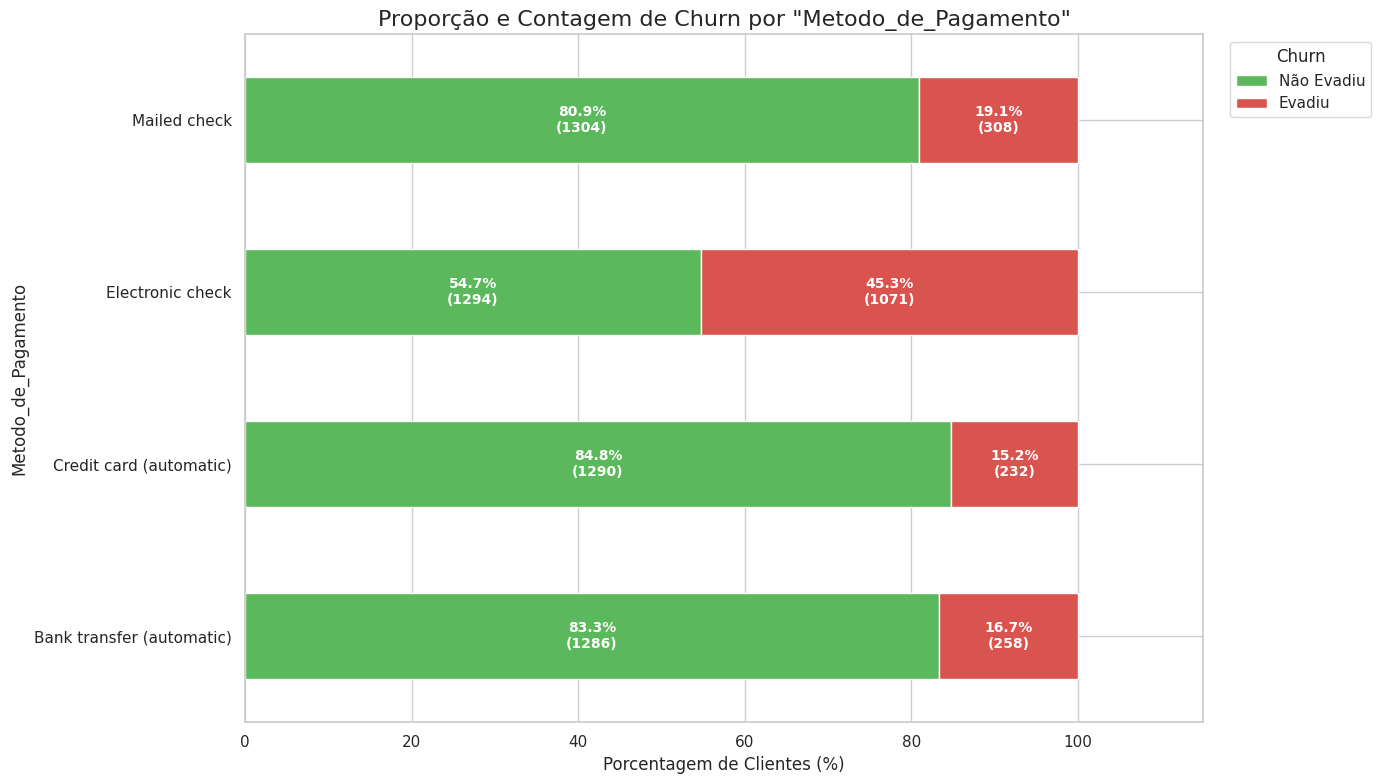

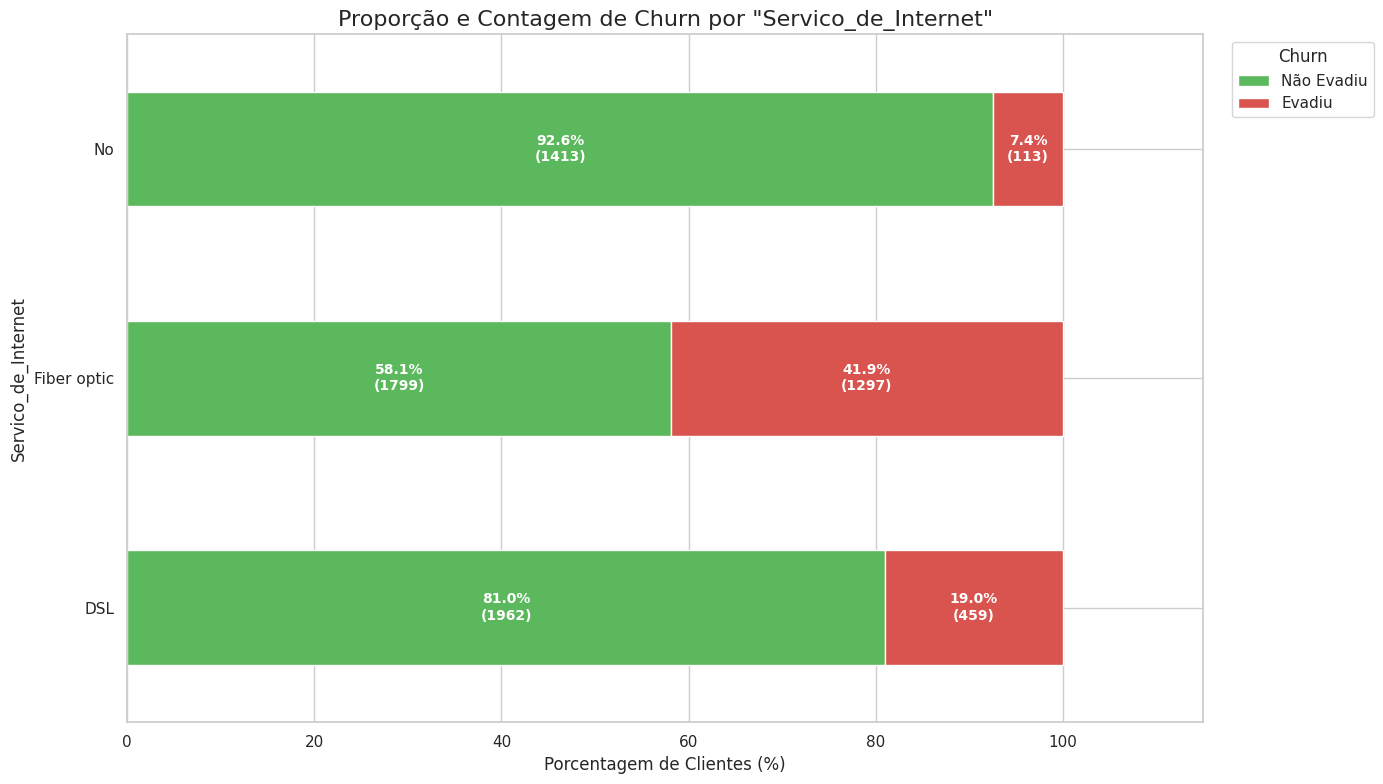

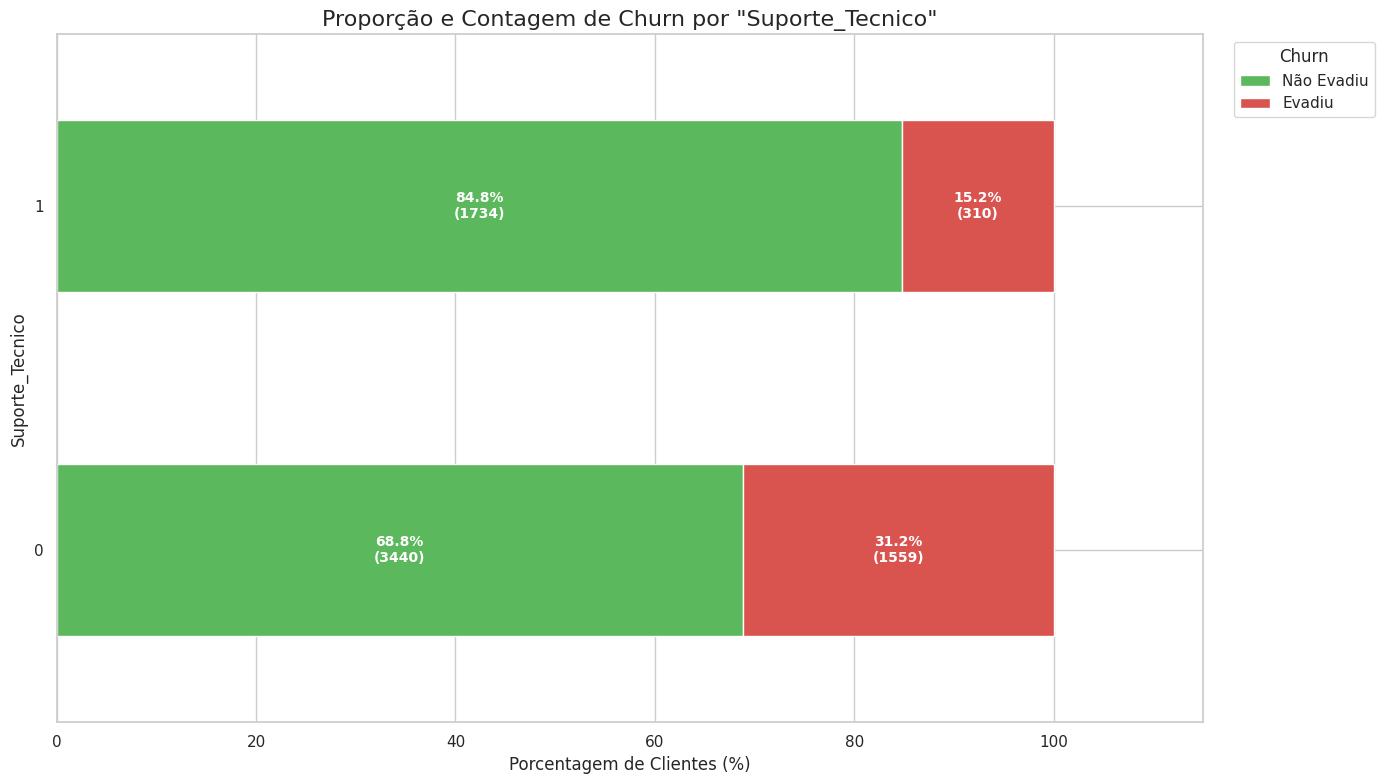

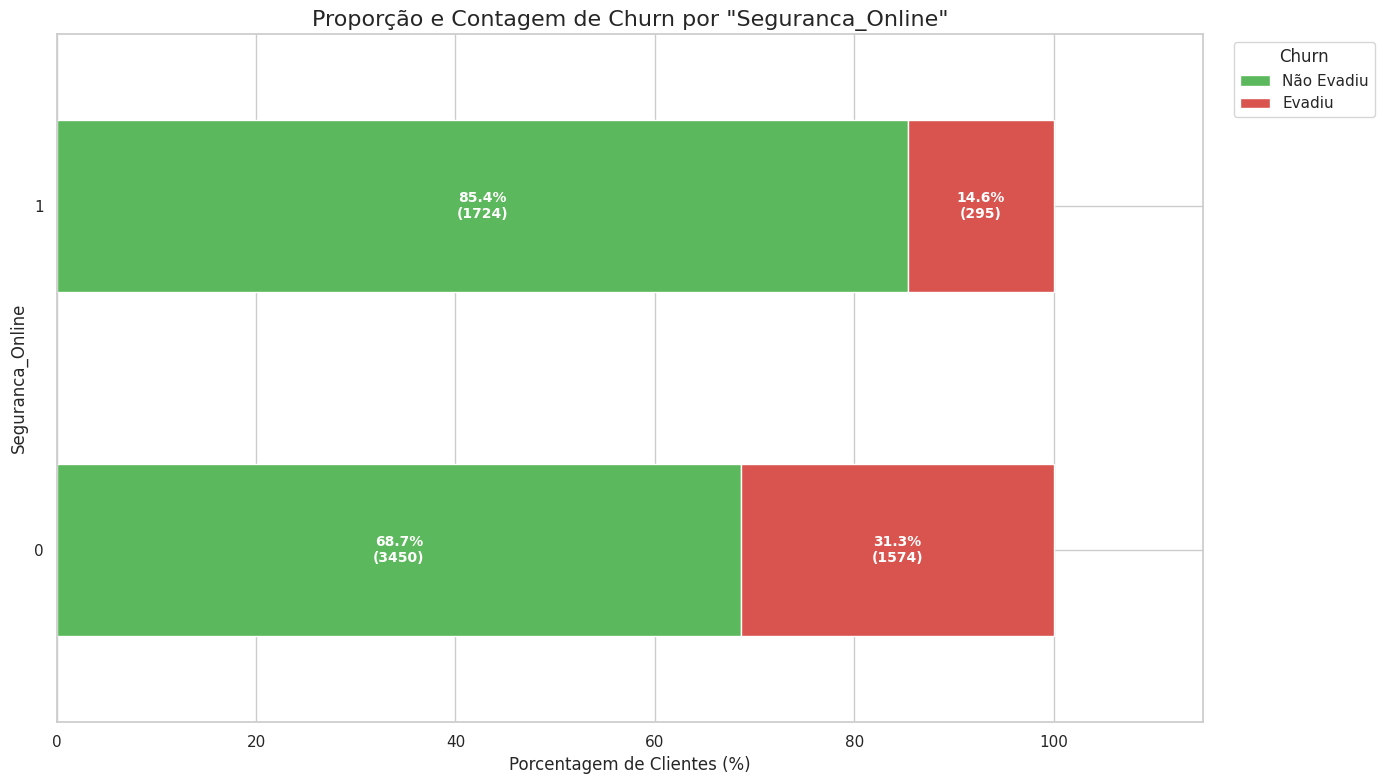

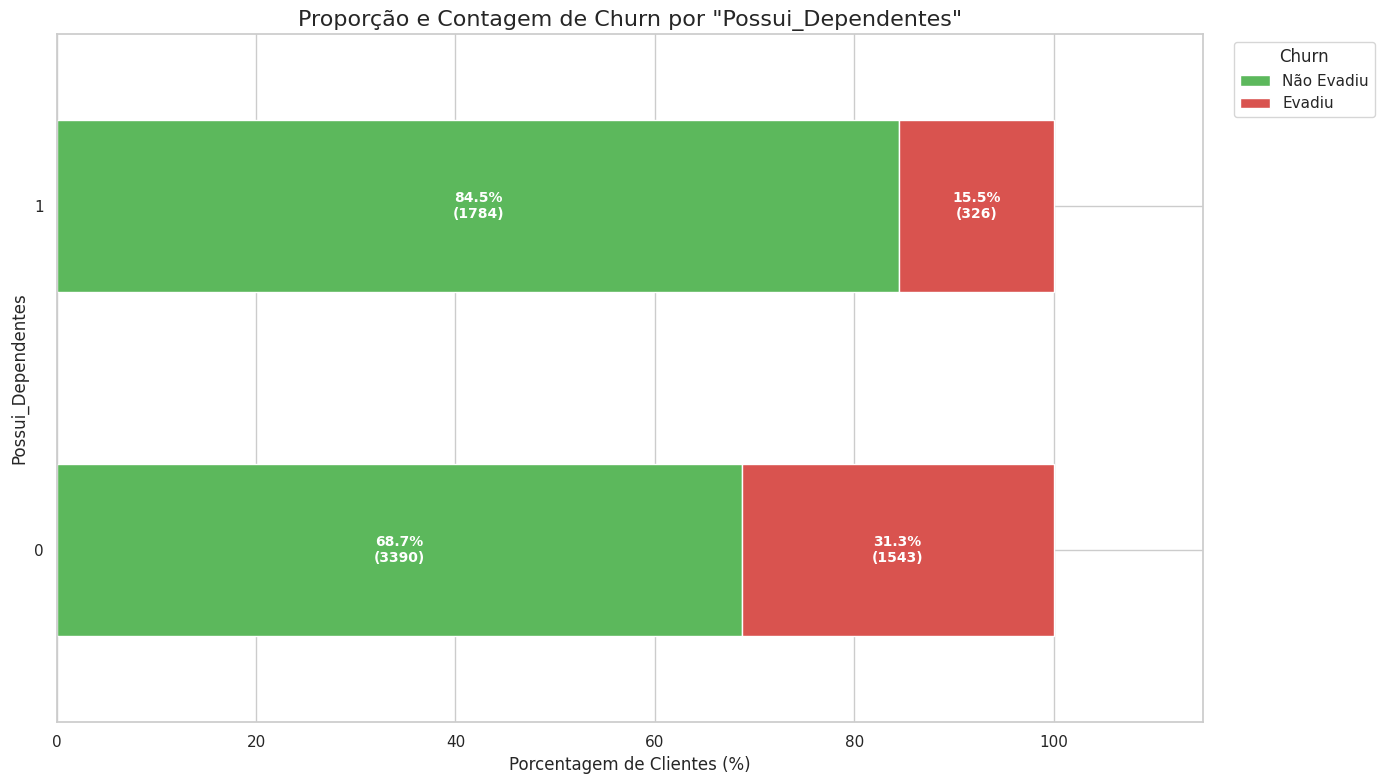

In [ ]:
# --- 3. EVASÃO POR VARIÁVEIS CATEGÓRICAS (VERSÃO COM LISTA COMPLETA) ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

print("--- Análise Proporcional de Churn por Categoria (com Contagem Absoluta) ---")

# LISTA MAIS COMPLETA: Sinta-se à vontade para adicionar ou remover colunas aqui!
colunas_para_analise = [
    'Tipo_de_Contrato',
    'Metodo_de_Pagamento',
    'Servico_de_Internet',
    'Suporte_Tecnico',
    'Seguranca_Online',
    'Possui_Dependentes'
]

for coluna in colunas_para_analise:
    # Passo 1: Calcular a tabela com as contagens absolutas
    tabela_contagem = pd.crosstab(df_tratado[coluna], df_tratado['Churn'])

    # Passo 2: Calcular a tabela com as porcentagens para desenhar o gráfico
    tabela_percentual = tabela_contagem.div(tabela_contagem.sum(axis=1), axis=0) * 100

    # Passo 3: Criar o gráfico de barras 100% empilhado
    ax = tabela_percentual.plot(
        kind='barh',
        stacked=True,
        figsize=(14, 8),
        color=['#5cb85c', '#d9534f']
    )

    # Passo 4: Adicionar os rótulos personalizados (porcentagem e contagem)
    for i, container in enumerate(ax.containers):
        counts = tabela_contagem.iloc[:, i]
        labels = [f"{p.get_width():.1f}%\n({int(count)})" for p, count in zip(container, counts)]
        ax.bar_label(container, labels=labels, label_type='center', color='white', weight='bold', fontsize=10)

    plt.title(f'Proporção e Contagem de Churn por "{coluna}"', fontsize=16)
    plt.xlabel('Porcentagem de Clientes (%)', fontsize=12)
    plt.ylabel(coluna, fontsize=12)
    plt.legend(['Não Evadiu', 'Evadiu'], title='Churn', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.xlim(0, 115)
    plt.tight_layout()
    plt.show()

4. Contagem de Evasão por Variáveis Numéricas

--- Análise da variável: Tempo_de_Contrato_Meses ---


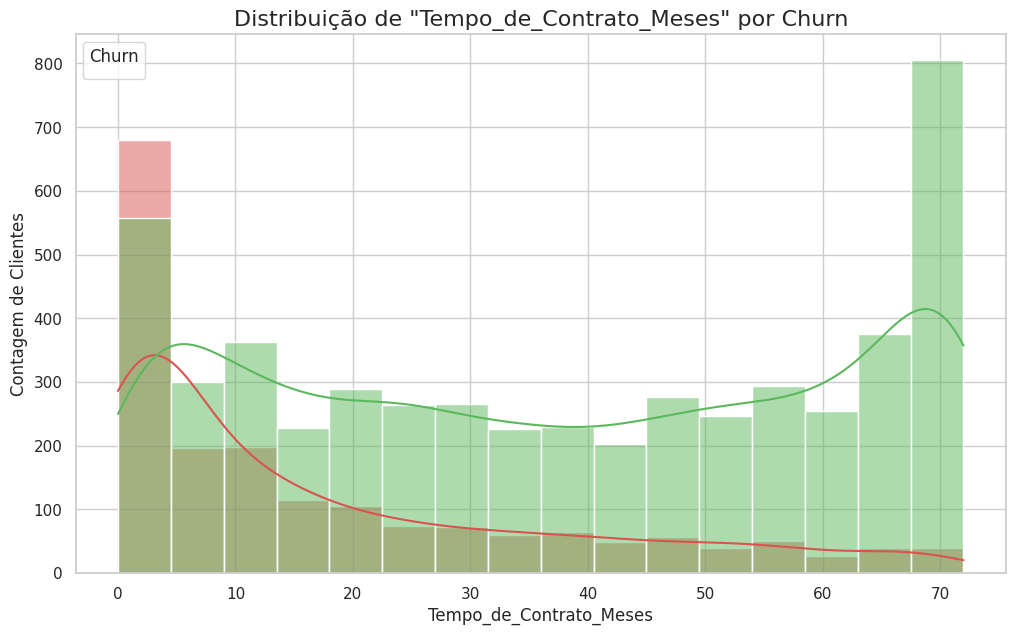

/tmp/ipython-input-46-1154294699.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=coluna, data=df_tratado, palette=['#5cb85c', '#d9534f'])


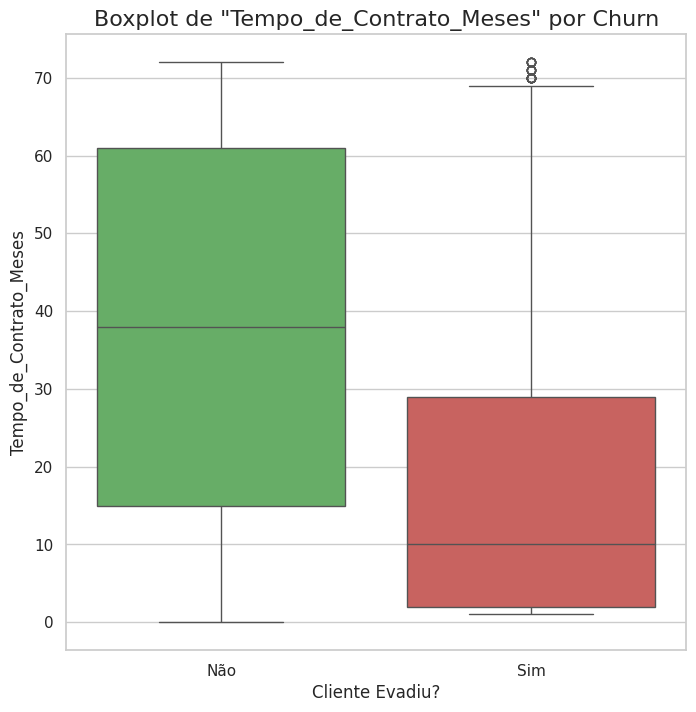



--- Análise da variável: Gasto_Mensal ---


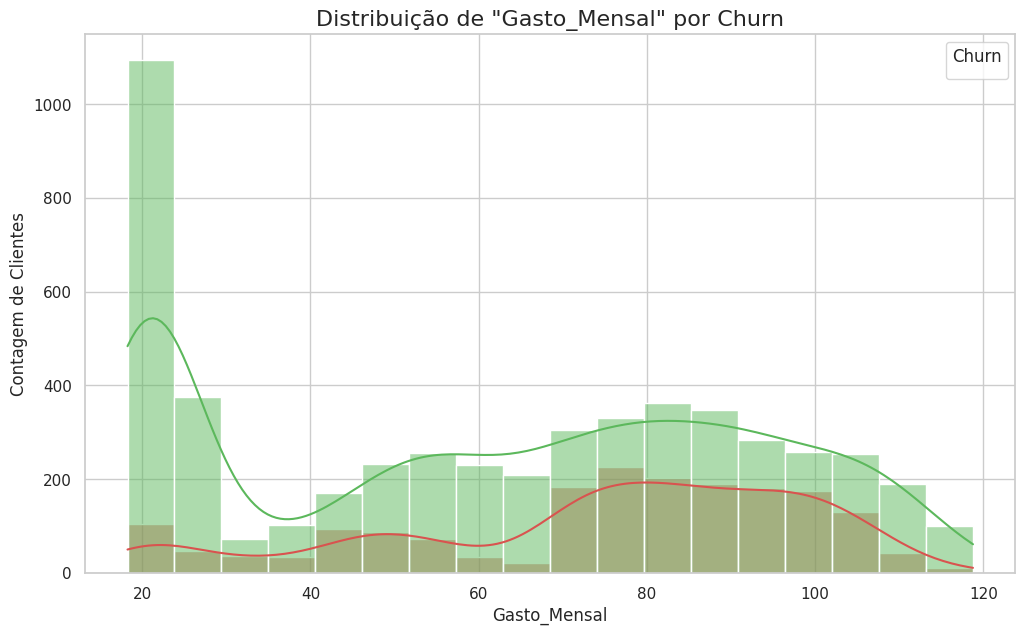

/tmp/ipython-input-46-1154294699.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=coluna, data=df_tratado, palette=['#5cb85c', '#d9534f'])


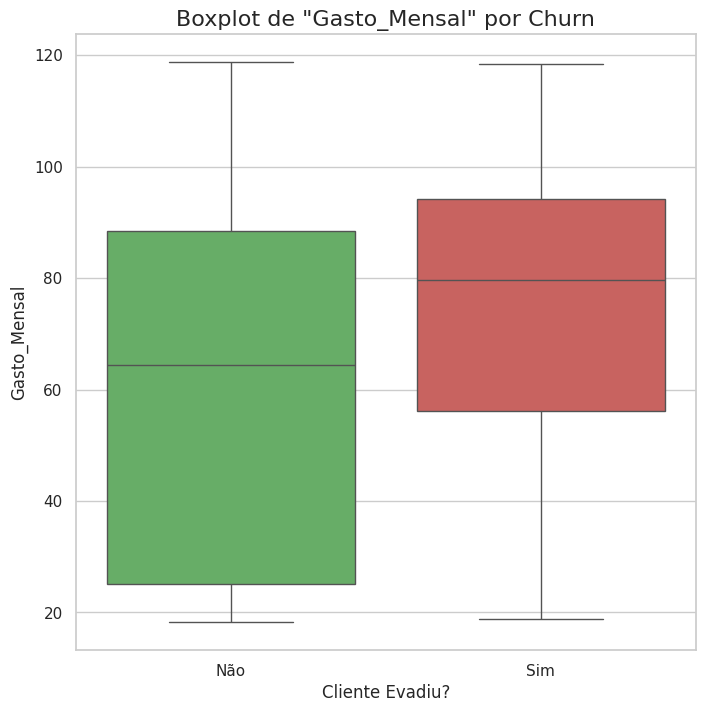



--- Análise da variável: Gasto_Total ---


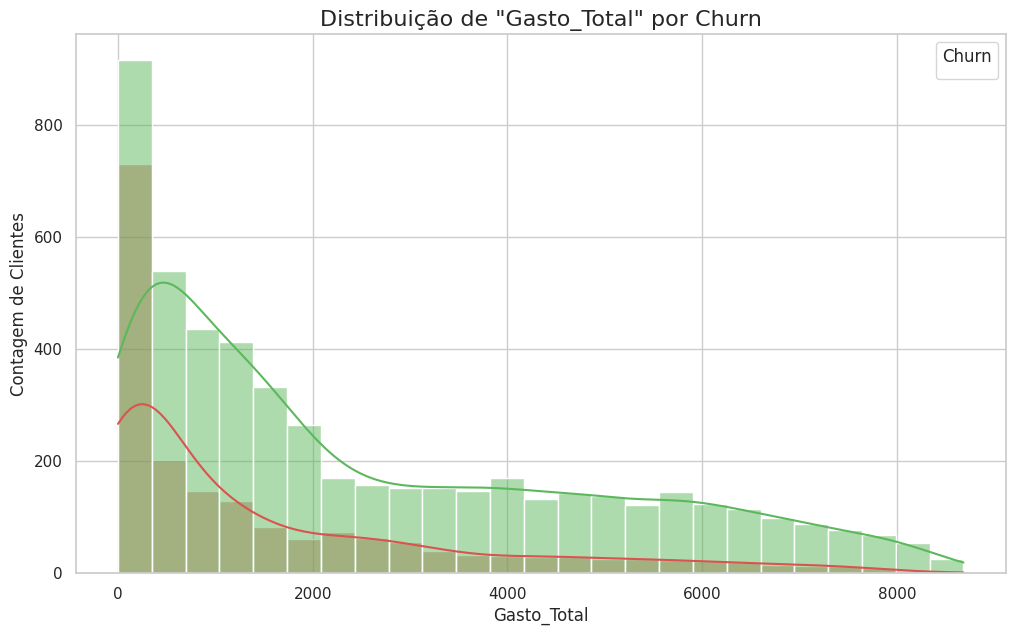

/tmp/ipython-input-46-1154294699.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=coluna, data=df_tratado, palette=['#5cb85c', '#d9534f'])


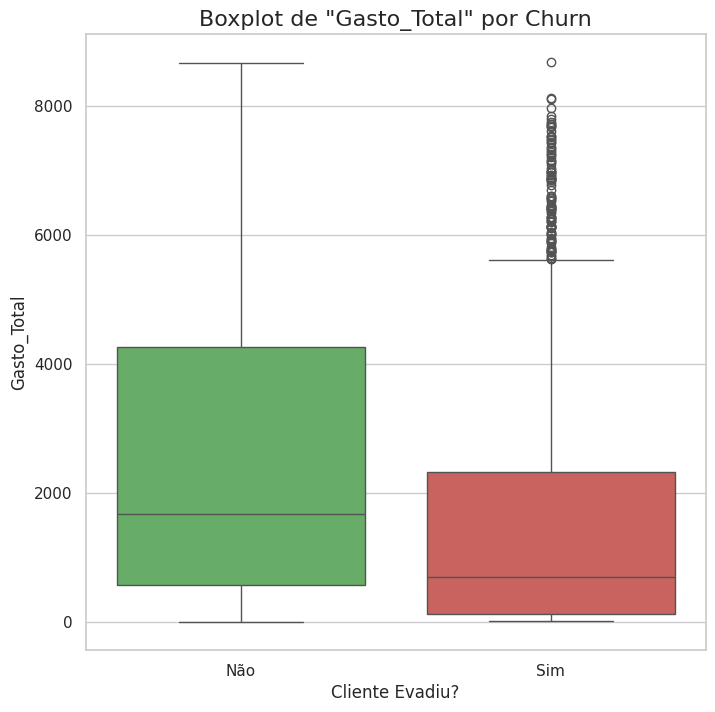

In [ ]:
# --- 4. ANÁLISE DE CHURN POR VARIÁVEIS NUMÉRICAS ---

# Importar as bibliotecas, caso ainda não tenha feito na célula
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o estilo dos gráficos
sns.set(style="whitegrid")

# Lista das principais colunas numéricas para análise
colunas_numericas_analise = [
    'Tempo_de_Contrato_Meses',
    'Gasto_Mensal',
    'Gasto_Total'
]

for coluna in colunas_numericas_analise:
    print(f"--- Análise da variável: {coluna} ---")

    # ===================================================================
    # GRÁFICO 1: HISTOGRAMA / KDE PLOT
    # Compara o formato da distribuição dos dados entre os grupos.
    # ===================================================================
    plt.figure(figsize=(12, 7))

    # Usamos o 'hue' para criar uma distribuição para cada valor de 'Churn'
    sns.histplot(data=df_tratado, x=coluna, hue='Churn', kde=True, palette=['#5cb85c', '#d9534f'])

    plt.title(f'Distribuição de "{coluna}" por Churn', fontsize=16)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel('Contagem de Clientes', fontsize=12)

    # Ajusta a legenda para ficar mais clara
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['Não Evadiu', 'Evadiu'], title='Churn')

    plt.show()

    # ===================================================================
    # GRÁFICO 2: BOXPLOT
    # Compara a mediana, os quartis e os outliers dos dados.
    # ===================================================================
    plt.figure(figsize=(8, 8))

    sns.boxplot(x='Churn', y=coluna, data=df_tratado, palette=['#5cb85c', '#d9534f'])

    plt.title(f'Boxplot de "{coluna}" por Churn', fontsize=16)
    plt.xlabel('Cliente Evadiu?', fontsize=12)
    plt.ylabel(coluna, fontsize=12)
    plt.xticks([0, 1], ['Não', 'Sim'])

    plt.show()
    print("\n" + "="*50 + "\n")

5. Análise de Correlação entre Variáveis

--- Iniciando a Análise de Correlação ---
Nova coluna 'Quantidade_Servicos' criada com sucesso.

--- Matriz de Correlação (Heatmap) ---


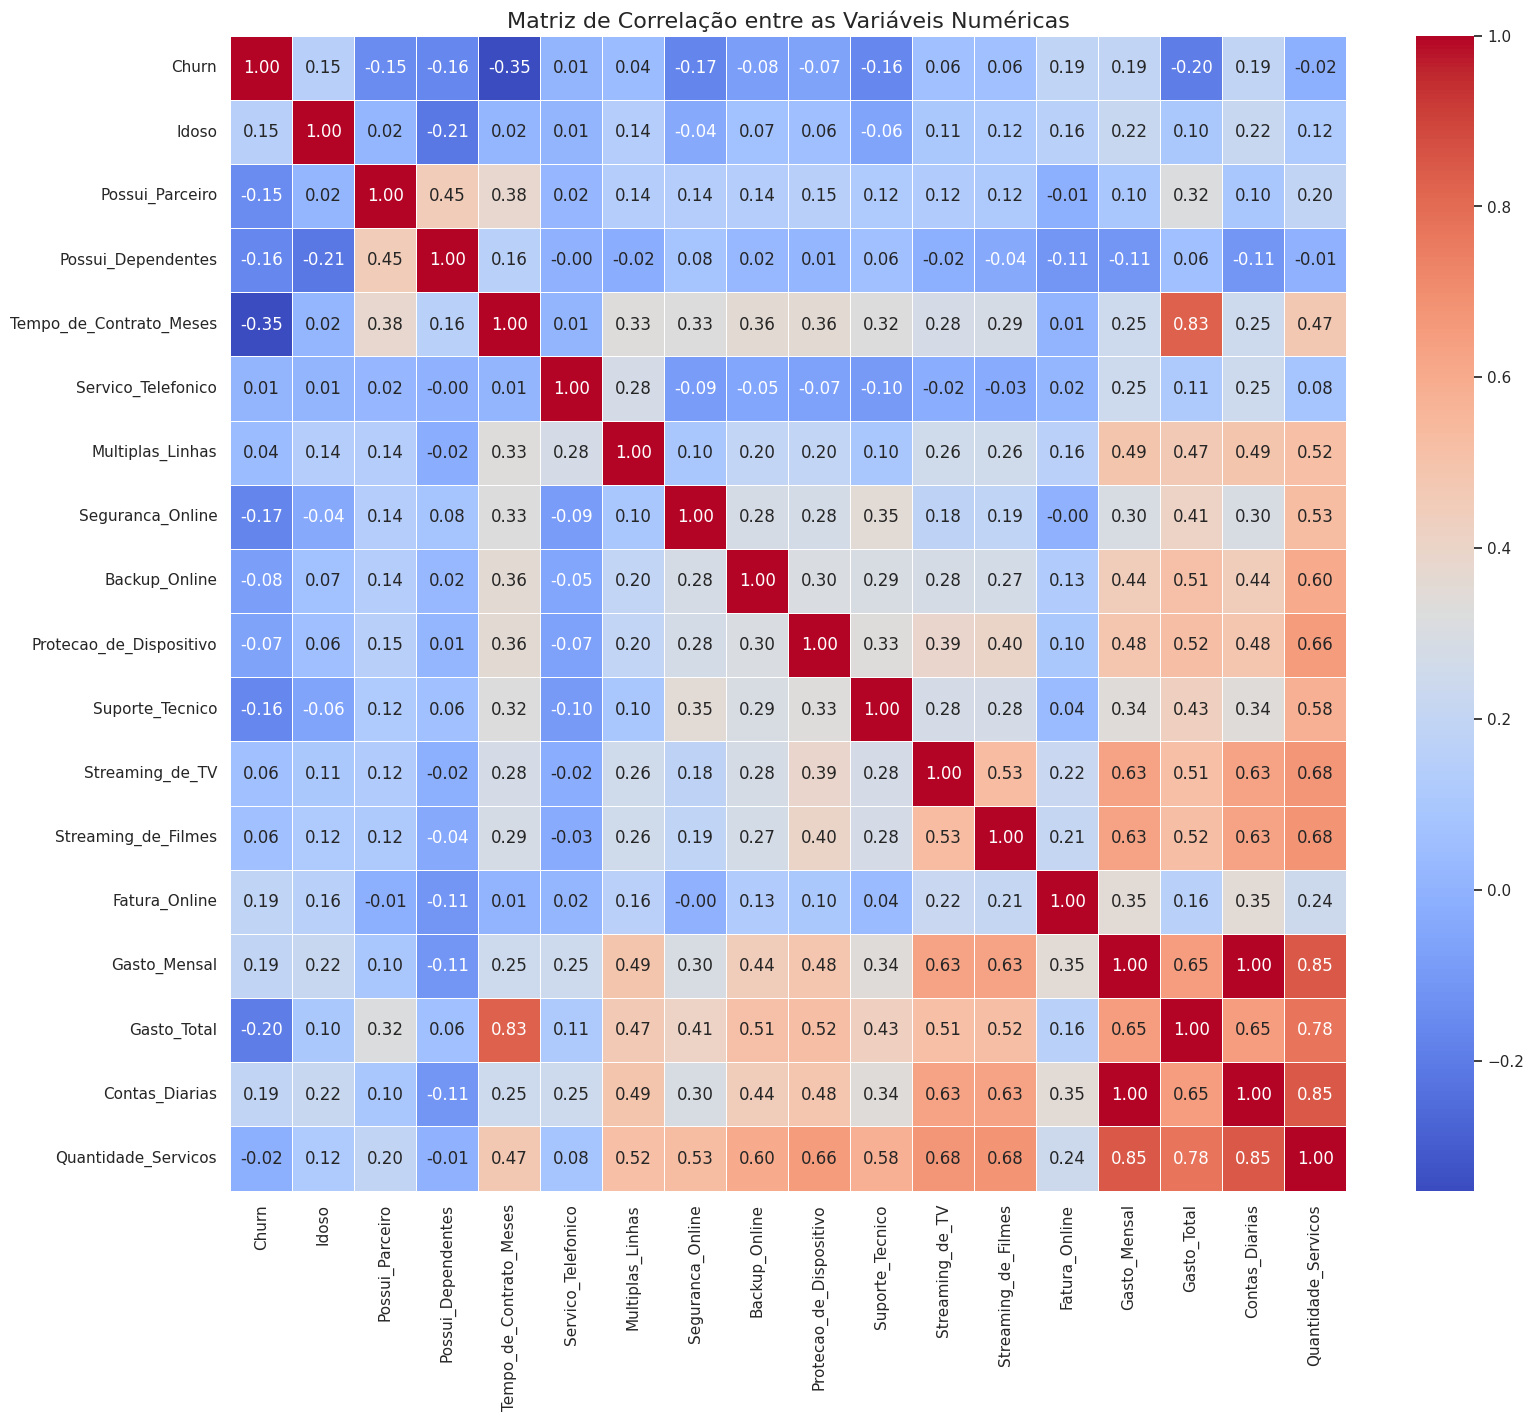


--- Correlação de todas as variáveis com o Churn ---


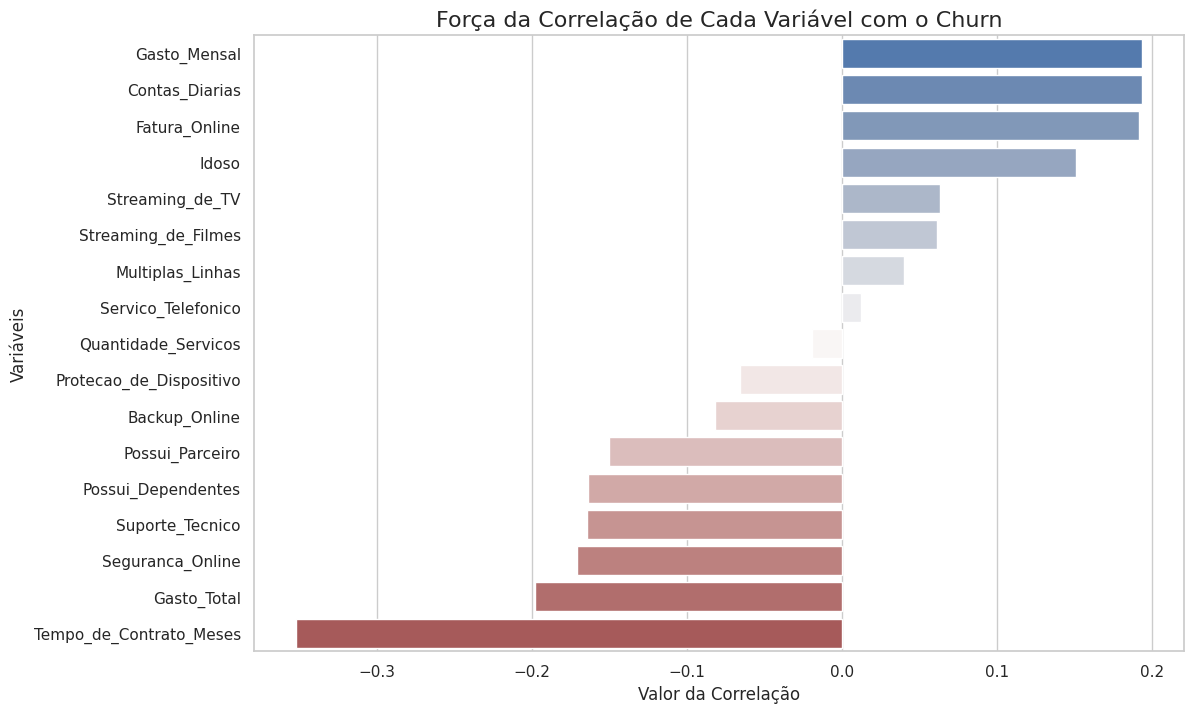

In [ ]:
# --- EXTRA: ANÁLISE DE CORRELAÇÃO (VERSÃO CORRIGIDA) ---

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("--- Iniciando a Análise de Correlação ---")

# ===================================================================
# PASSO 1: Criar a variável "Quantidade_Servicos"
# ===================================================================
df_para_corr = df_tratado.copy() # Criar uma cópia para não alterar o df_tratado original

# MUDANÇA 1: Lógica para criar a coluna numérica de forma mais direta.
# Usamos .map() para criar a versão numérica, o que é mais explícito neste caso.
df_para_corr['Servico_de_Internet_Num'] = df_para_corr['Servico_de_Internet'].map({'DSL': 1, 'Fiber optic': 1, 'No': 0}).astype(int)

colunas_de_servicos_soma = [
    'Servico_Telefonico', 'Multiplas_Linhas', 'Seguranca_Online',
    'Backup_Online', 'Protecao_de_Dispositivo', 'Suporte_Tecnico',
    'Streaming_de_TV', 'Streaming_de_Filmes', 'Servico_de_Internet_Num'
]

df_para_corr['Quantidade_Servicos'] = df_para_corr[colunas_de_servicos_soma].sum(axis=1)
df_para_corr.drop(columns=['Servico_de_Internet_Num'], inplace=True)

print("Nova coluna 'Quantidade_Servicos' criada com sucesso.")

# ===================================================================
# PASSO 2: Calcular e visualizar a matriz de correlação
# ===================================================================
print("\n--- Matriz de Correlação (Heatmap) ---")

df_numerico = df_para_corr.select_dtypes(include=['int64', 'float64', 'int32'])
matriz_correlacao = df_numerico.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre as Variáveis Numéricas', fontsize=16)
plt.show()

# ===================================================================
# PASSO 3: Foco na Correlação com a variável "Churn"
# ===================================================================
print("\n--- Correlação de todas as variáveis com o Churn ---")

corr_churn = matriz_correlacao['Churn'].drop('Churn').sort_values(ascending=False)

plt.figure(figsize=(12, 8))

# MUDANÇA 2: Adicionado hue e legend=False para remover o aviso do barplot
sns.barplot(x=corr_churn.values, y=corr_churn.index, palette='vlag', hue=corr_churn.index, legend=False)

plt.title('Força da Correlação de Cada Variável com o Churn', fontsize=16)
plt.xlabel('Valor da Correlação', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.show()

# 4. RELATÓRIO **FINAL**

# 📄 Relatório Final: Análise de Evasão de Clientes (Churn) da Telecom X  
**Autor:** Pedro Jhevison Menezes  
**Data:** 01 de julho de 2025  

---

## 1. Introdução

O presente relatório detalha a análise exploratória de dados realizada sobre a base de clientes da empresa **Telecom X**. O principal objetivo deste projeto é investigar e compreender os fatores que levam à evasão de clientes, um problema conhecido como *Churn*.

A alta taxa de churn representa uma perda significativa de receita e indica possíveis insatisfações com os serviços oferecidos. Através da análise dos dados demográficos, de contrato, de serviços e financeiros dos clientes, buscamos identificar os principais perfis de clientes propensos a cancelar o serviço. Os insights gerados aqui servirão de base para que a equipe de ciência de dados possa construir modelos preditivos e para que a empresa possa desenvolver estratégias de retenção mais eficazes.

---

## 2. Limpeza e Tratamento de Dados

Para garantir a qualidade e a precisão da análise, os dados brutos passaram por um rigoroso processo de **Extração, Transformação e Carga (ETL)**. As seguintes etapas foram executadas:

- **Extração:** Os dados foram importados diretamente de uma API, que forneceu as informações em formato JSON.
- **Normalização:** O JSON, que possuía uma estrutura aninhada, foi "achatado" utilizando a função `pandas.json_normalize`, transformando os dados em uma tabela única e acessível.

### Tratamento de Inconsistências:
- A coluna `Gasto_Total` foi convertida de texto para formato numérico, tratando valores inconsistentes (espaços em branco), que foram transformados em zero para clientes novos.
- Foram removidos **224 registros** que não possuíam informação na coluna `Churn`.
- Categorias como `"No phone service"` e `"No internet service"` foram padronizadas para `"No"` para manter a consistência entre as colunas de serviços.

### Engenharia de Atributos:
- Uma nova coluna, `Contas_Diarias`, foi criada a partir do `Gasto_Mensal` para possibilitar outras perspectivas de análise.

### Padronização Final:
- Colunas binárias com valores `"Yes"` e `"No"` foram convertidas para `1` e `0`, respectivamente.
- Todas as colunas foram renomeadas para o português, tornando o dataset final mais claro e intuitivo.

---

## 3. Análise Exploratória de Dados (EDA)

Nesta seção, apresentamos os principais gráficos que sustentam nossas conclusões.

> 💡 **(Inserir aqui os seguintes gráficos):**
> - Proporção de Evasão  
> - Churn por Tipo de Contrato  
> - Churn por Método de Pagamento  
> - Boxplot de Tempo de Contrato  
> - Boxplot de Gasto Mensal  
> - Matriz de Correlação  

### Análise de Correlação

Para aprofundar a análise, foi calculada a **correlação** entre todas as variáveis numéricas. A visualização por **heatmap** e **gráfico de barras focado no churn** confirmou numericamente os padrões observados:

- 📉 **Correlação Negativa com Churn:**
  - `Tempo_de_Contrato_Meses`: correlação de **-0.35** → quanto maior o tempo, menor a chance de evasão.

- 📈 **Correlação Positiva com Churn:**
  - `Gasto_Mensal`: correlação de **+0.19** → clientes com contas mais altas têm maior propensão ao churn.

- 🔄 **Outras Correlações:**
  - `Gasto_Total` e `Tempo_de_Contrato_Meses` possuem correlação positiva forte, como esperado.

---

## 4. Conclusões e Insights

A análise dos dados revelou padrões claros sobre o perfil dos clientes que tendem a deixar a **Telecom X**:

- **Contrato Mês a Mês é o maior vilão:** Clientes com contrato `Month-to-month` têm churn muito superior aos de contrato anual ou bienal.
- **Tenure (Tempo de Contrato) é determinante:** Clientes que cancelam costumam estar nos **primeiros meses de contrato**.
- **Preço Mensal pesa na decisão:** Quanto maior o `Gasto_Mensal`, maior a evasão, indicando sensibilidade a preço.
- **Cheque Eletrônico = Alerta:** Clientes que usam `Cheque Eletrônico` têm maior taxa de churn. Métodos automáticos são mais seguros para retenção.
- **Falta de Serviços = Risco:** Ausência de serviços como `Suporte_Tecnico` e `Seguranca_Online` aumenta o risco de churn.

---

## 5. Recomendações Estratégicas

Com base nos insights obtidos, recomendamos as seguintes estratégias:

### ✅ Campanhas de Migração de Contrato
- Incentivar clientes com contrato **Mês a Mês** a migrar para planos de 1 ou 2 anos.
- Oferecer **descontos iniciais** ou **serviços extras** como bônus de fidelização.

### ✅ Programa de Onboarding para Novos Clientes
- Criar um fluxo de boas-vindas focado nos **primeiros 90 dias**.
- Garantir que o cliente perceba o valor do serviço desde o início.

### ✅ Incentivo a Pagamentos Automáticos
- Oferecer **benefícios para quem migrar do Cheque Eletrônico** para Cartão de Crédito ou Débito Automático.

### ✅ Oferta de Serviços de Valor Agregado
- Criar **combos promocionais com Suporte Técnico e Segurança Online** para clientes em situação de risco (ex: contrato mensal + gasto alto).

---

📌 *Este relatório representa uma etapa fundamental na compreensão da evasão de clientes na Telecom X e serve como base sólida para ações estratégicas e preditivas futuras.*
